# Прогнозирование оттока клиентов фитнес-центра

---

<p align='center'>
  <img src='https://riseapps.co/wp-content/uploads/2020/10/Cover-1024x768.png' width=500 height=200 />
</p>

---

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Индикаторы оттока зависят от специфики отрасли. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Чтобы бороться с оттоком, отдел по работе с клиентами перевёл в электронный вид множество клиентских анкет 

**Цель** — провести анализ и подготовить план действий по удержанию клиентов

---

## Задачи исследования

<br/>

**Шаг 1.** Получение данных <br/> <br/> 
Фитнес-центр предоставил сведения в *csv*-файлах, которые содержат данные на месяц до оттока и факт оттока на определённый месяц

**Шаг 2.** Исследовательский анализ данных (EDA)
1. Произвести численное описание признаков
2. Изучить средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
3. Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался
4. Построить и отобразить матрицу корреляций

**Шаг 3.** Построение модели прогнозирования оттока клиентов
1. Построить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце
2. Обучить модель на *train*-выборке двумя способами: логистической регрессией и случайным лесом
3. Оценить метрики *accuracy*, *precision* и *recall* для обеих моделей на валидационной выборке. Сравнить модели по ним и выявить лучшую

**Шаг 4.** Кластеризация клиентов
1. Стандартизировать данные
2. Построить матрицы расстояний на стандартизованной матрице признаков и отобразить дендрограмму
3. Обучить модель кластеризации на основании алгоритма *K-Means* и спрогнозировать кластеры клиентов
4. Изучить средние значения признаков для кластеров
5. Построить распределения признаков для кластеров
6. Для каждого полученного кластера посчитать долю оттока

**Шаг 5.** Формулировка выводов и базовых рекомендаций по работе с клиентами

---

## Содержание проекта
---
1. [**Получение данных**](#Получение-данных) <br/>
    1.1 [Вывод по п.1](#Вывод-по-п.1) <br/>

2. [**Исследовательский анализ данных (*EDA*)**](#Исследовательский-анализ-данных-(EDA)) <br/>
    2.1 [Численное описание признаков](#Численное-описание-признаков) <br/>
    2.2 [Изучение средних значений признаков в группах](#Изучение-средних-значений-признаков-в-группах) <br/>
    2.3 [Визуализация распределения признаков в группах](#Визуализация-распределения-признаков-в-группах) <br/> 
    2.4 [Построение матрицы корреляций признаков](#Построение-матрицы-корреляций-признаков) <br/>
    2.5 [Вывод по п.2](#Вывод-по-п.2) <br/>
    
3. [**Построение модели прогнозирования оттока клиентов**](#Построение-модели-прогнозирования-оттока-клиентов) <br/>
    3.1 [Разбиение данных на обучающую и валидационную выборку](#Разбиение-данных-на-обучающую-и-валидационную-выборку) <br/>
    3.2 [Обучение моделей](#Обучение-моделей) <br/>
    3.3 [Оценка метрик и сравнение моделей](#Оценка-метрик-и-сравнение-моделей) <br/>
    3.4 [Вывод по п.3](#Вывод-по-п.3) <br/>
    
4. [**Кластеризация клиентов**](#Кластеризация-клиентов) <br/>
    4.1 [Стандартизация данных](#Стандартизация-данных) <br/>
    4.2 [Построение матрицы расстояний и дендрограммы](#Построение-матрицы-расстояний-и-дендрограммы) <br/>
    4.3 [Прогнозирование кластеров клиентов с помощью алгоритма *K-Means*](#Прогнозирование-кластеров-клиентов-с-помощью-алгоритма-K-Means) <br/>
    4.4 [Изучение средних значений признаков для кластеров](#Изучение-средних-значений-признаков-для-кластеров) <br/>
    4.5 [Визуализация распределения признаков для кластеров](#Визуализация-распределения-признаков-для-кластеров) <br/>
    4.6 [Расчет доли оттока для кластеров](#Расчет-доли-оттока-для-кластеров) <br/>
    4.7 [Вывод по п.4](#Вывод-по-п.4) <br/>
    
5. [**Общий вывод исследования**](#Общий-вывод-исследования)

## Получение данных
---

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram 
from sklearn.cluster import KMeans

from IPython.display import display

# снятие ограничения на количество отображаемых столбцов
pd.set_option('display.max_columns', None)
# установка единой темы для визуализаций
sns.set()

Прочитаем файл *gym_churn.csv* и сохраним в переменной `gym`:

In [2]:
# чтение файла с данными методом read_csv() и сохранение в соответствующей переменной
gym = pd.read_csv('gym_churn.csv')

Для демонстрации пяти первых записей в таблице и полной информации о ней, а также проверки датасета на скрытые аномалии создадим функцию **`show_full_info()`**:

In [3]:
# создание функции show_full_info() с аргументом table
def show_full_info(table):
    '''
    Принимает на вход датафрейм с выводом его названия, размера методом shape, пяти первых записей методом 
    head() и информации методом info(), а также количества отрицательных, пропущенных, нулевых, уникальных, 
    максимального и минимального значений по столбцам, количества полных дубликатов строк
    '''
    # получение с помощью анонимной функции имени таблицы
    print(f'Таблица {[x for x in globals() if globals()[x] is table][0]}')
    # получение с помощью метода shape размера таблицы
    print(f'Размер: {table.shape[0]} строк, {table.shape[1]} столбцов')
    print('-----------------------------------------------------------------------------')
    # получение с помощью метода head() пяти первых записей
    display(table.head())
    print('-----------------------------------------------------------------------------')
    # получение с помощью метода info() информации о таблице
    table.info()
    print('-----------------------------------------------------------------------------')
    # составление датафрейма с характеристиками по каждому столбцу 
    display(pd.DataFrame({'Всего': table.count(),\
                          'Отрицательных': table._get_numeric_data().lt(0).sum(),\
                          'Нулевых': table._get_numeric_data().eq(0).sum(),\
                          'Пропущенных': table.isna().sum(),\
                          'Уникальных': table.nunique(),\
                          'Минимальное': table._get_numeric_data().min(),\
                          'Максимальное': table._get_numeric_data().max()}))
    print('Количество полных дубликатов строк:', table.duplicated().sum())
    print('')

Применим к датасету `gym` функцию `show_full_info()`:

In [4]:
# вызов функции show_full_info() с аргументом gym
show_full_info(gym)

Таблица gym
Размер: 4000 строк, 14 столбцов
-----------------------------------------------------------------------------


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: f

,Всего,Отрицательных,Нулевых,Пропущенных,Уникальных,Минимальное,Максимальное
gender,4000,0,1959,0,2,0.000000,1.000000
Near_Location,4000,0,619,0,2,0.000000,1.000000
Partner,4000,0,2053,0,2,0.000000,1.000000
Promo_friends,4000,0,2766,0,2,0.000000,1.000000
Phone,4000,0,386,0,2,0.000000,1.000000
Contract_period,4000,0,0,0,3,1.000000,12.000000
Group_visits,4000,0,2351,0,2,0.000000,1.000000
Age,4000,0,0,0,23,18.000000,41.000000
Avg_additional_charges_total,4000,0,0,0,4000,0.148205,552.590740
Month_to_end_contract,4000,0,0,0,12,1.000000,12.000000


Количество полных дубликатов строк: 0



Опишем полученный результат.

Всего в таблице `4000` записей в `14` столбцах с типами данных – целочисленный `int64` и вещественный `float64`:
1. **`Churn`** — факт оттока в текущем месяце <br/> <br/> 
Данные клиента за предыдущий до проверки факта оттока месяц: <br/>
2. **`gender`** — пол
3. **`Near_Location`** — проживание или работа в районе, где находится фитнес-центр
4. **`Partner`** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
5. **`Promo_friends`** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
6. **`Phone`** — наличие контактного телефона
7. **`Age`** — возраст
8. **`Lifetime`** — время с момента первого обращения в фитнес-центр (в месяцах) <br/> <br/>
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента: <br/>
9. **`Contract_period`** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
10. **`Month_to_end_contract`** — срок до окончания текущего действующего абонемента (в месяцах)
11. **`Group_visits`** — факт посещения групповых занятий
12. **`Avg_class_frequency_total`** — средняя частота посещений в неделю за все время с начала действия абонемента
13. **`Avg_class_frequency_current_month`** — средняя частота посещений в неделю за предыдущий месяц
14. **`Avg_additional_charges_total`** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

Наблюдаем следующие проблемы:

1. Названия столбцов следует привести к нижнему регистру
2. Тип данных в столбце `Month_to_end_contract` (срок до окончания текущего действующего абонемента в месяцах) целесообразнее изменить на целочисленный `int`

In [5]:
# приведение названий столбцов к нижнему регистру методом lower()
gym.columns = [column.lower() for column in gym]

# приведение столбца month_to_end_contract к целочисленному типу методом astype()
gym.month_to_end_contract = gym.month_to_end_contract.astype('int')

### Вывод по п.1
---

На данном этапе было произведено **получение данных о посетителях фитнес-центра**. Датасет содержит полную информацию, необходимую для кластеризации клиентов и построения модели прогнозирования оттока посетителей

В ходе проведения обзора представленных данных была создана функция `show_full_info()` для вывода пяти первых записей в таблице и полной информации о ней, а также количества артефактов по столбцам. Пропущенных, некорректных значений, а также полных дубликатов строк не выявлено

Названия столбцов приведены к нижнему регистру, тип данных в столбце `month_to_end_contract` (срок до окончания текущего действующего абонемента в месяцах) изменен на целочисленный `int`

---

## Исследовательский анализ данных (EDA)

---

### Численное описание признаков

---

С помощью метода `describe()` изучим средние значения и стандартные отклонения признаков:

In [6]:
# вывод численных характеристик датасета методом describe()
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Опишем выводы, полученные по итогу:

* Практически отстутвует различие в соотношении мужчин и женщин, однако мужчин немного больше (51%)
* Большинство клиентов (85%) проживают или работают рядом с фитнес-центром
* Почти половина клиентов (47%) – сотрудники компаний-партнеров клуба
* 31% клиентов пришел в клуб в рамках акции «приведи друга»
* Телефон в анкете указан почти у всех клиентов (90%)
* Средняя длительность текущего действующего абонемента составляет 4.7 месяца. Медианное же значение – 1 месяц (т.е. больше половины клиентов с абонементом на 1 месяц)
* 41% клиентов посещали групповые занятия
* Средний возраст – 29 лет
* Средняя выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон – 146.94 у.е. с клиента
* Среднее время до конца абонемента – 4,32 месяца. Однако, у более чем половины клиентов – 1 месяц
* В среднем клиенты с центром около 4 месяцев, медианное значение – 3 месяца
* Средняя частота посещений в неделю за прошлый месяц составляет – 1.88, средняя частота посещений в неделю за все время – 1.77. Прослеживается корреляция данных параметров
* **В прошлом месяце потеряно чуть больше четверти клиентов – 27%**

*Стандартные отклонения признаков разнятся по величине в достаточной степени для будущей их стандартизации перед обучением моделей*

### Изучение средних значений признаков в группах

---

Изучим средние значения по признакам в разрезе групп (`0` – оставшиеся клиенты, `1` – отток), для чего применим метод `groupby()`:

In [7]:
# группировка клиентов по столбцу churn с вычислением среднего по всем признакам mean()
# с помощью метода groupby() и транспонирование таблицы для более удобного отображения
gym.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Опишем имеющиеся сходства и различия:

* Соотношение мужчин и женщин также не отличается
* Живущие или работающие рядом клиенты реже попадают в отток
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб, чем остальные клиенты
* Клиенты, пришедшие по акции «приведи друга» почти в два раза реже уходят в отток
* Наличие мобильного номера клиента практически не отличается в группах
* Средняя длительность абонемента больше у оставшихся пользователей, в оттоке срок абонемента составляет 1 месяц
* Оставшиеся пользователи чаще ходят на групповые занятия
* У групп есть незначительная разница в среднем возрасте клиентов
* Наблюдается небольшое различие в выручке от других услуг фитнес-центра
* Оставшееся время до окончания срока действия абонемента больше у оставшихся клиентов
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

### Визуализация распределения признаков в группах

---

Перейдем к визуальному анализу распределения признаков в группах. <br/>
Для начала сохраним в переменных `binary_features` (бинарные признаки) и `quantitive_features` (количественные признаки) соответствующие названия столбцов:

In [8]:
# создание списка binary_features с бинарными признаками 
binary_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 
                   'group_visits', 'contract_period', 'churn']

# создание списка quantitive_features с количественными признаками 
quantitive_features = list(set(gym.columns) - set(binary_features))

Построим график частот для бинарных и порядковых переменных:

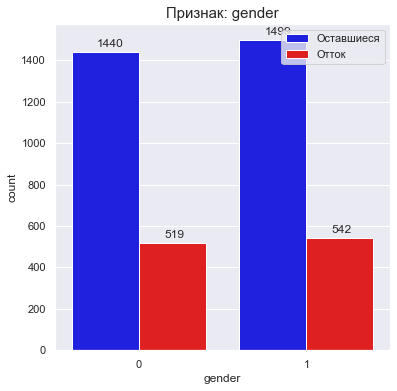

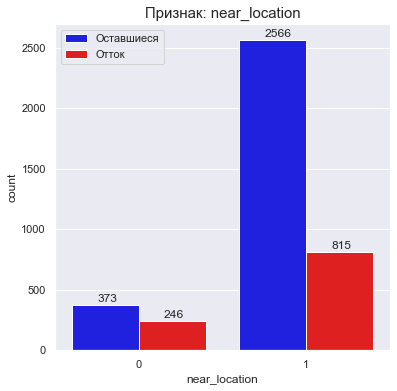

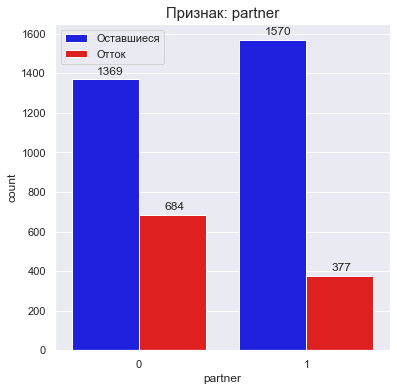

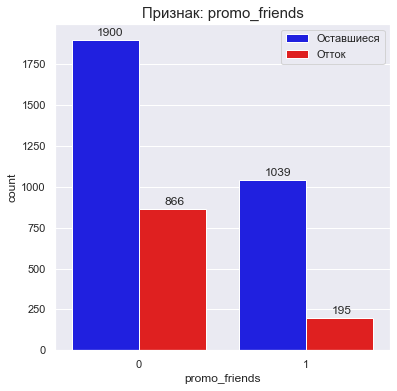

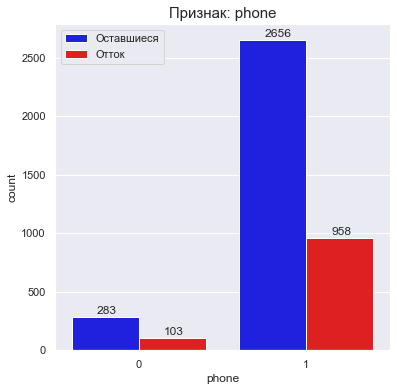

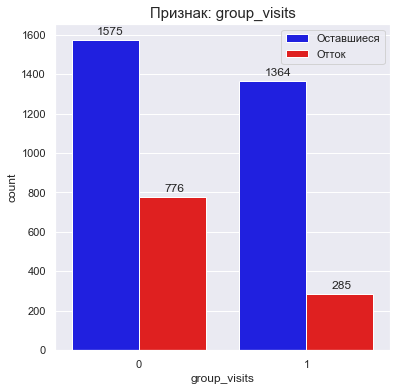

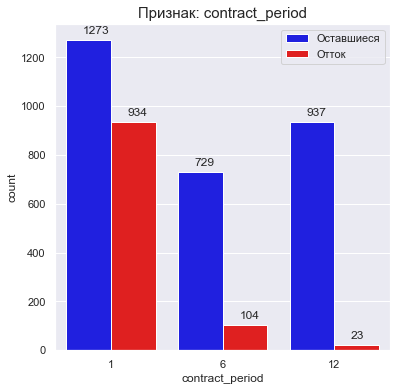

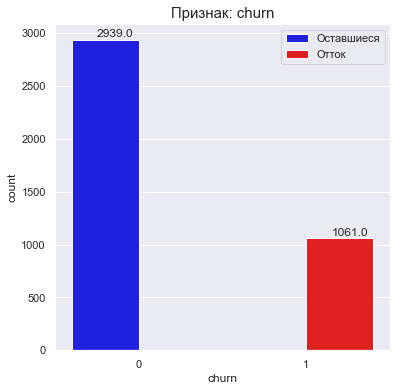

In [9]:
# построение countplot в цикле с размером поля figsize, подписью графика title,
# графиком ax, подписями столбцов ax.annotate и легендой legend
for column in binary_features:
    plt.figure(figsize=(6, 6))
    plt.title('Признак: {}'.format(column), fontsize=15)

    ax = sns.countplot(data=gym, x=gym[column], hue='churn', palette=['blue', 'red'])

    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+25))
    
    plt.legend(['Оставшиеся', 'Отток'])    
    plt.show()

Выводы из полученных распределений:

* По полу группы имеют схожее распределение частот
* Значительное количество оставшихся клиентов живут или работают рядом с фитнес-центром
* Вдвое больше клиентов, которые не являлись сотрудниками компаний-партнеров, попадают в отток по сравнению с оставшимися
* Также в оттоке больше клиентов, пришедших самостоятельно (без акции «приведи друга»)
* Подавляющее большинство клиентов оставляют контактный номер телефона
* Клиенты, попавшие в отток, в большинстве своем не посещают групповые занятия
* Длительность текущего действующего абонемента у группы оставшихся распределена почти равномерно между всеми возможными периодами, у оттока самое частое – 1 месяц
* Имеем 3/4 от общего числа предоставленных записей в оставшихся клиентах и 1/4 в оттоке

Построим гистограммы распределения признаков для количественных переменных:

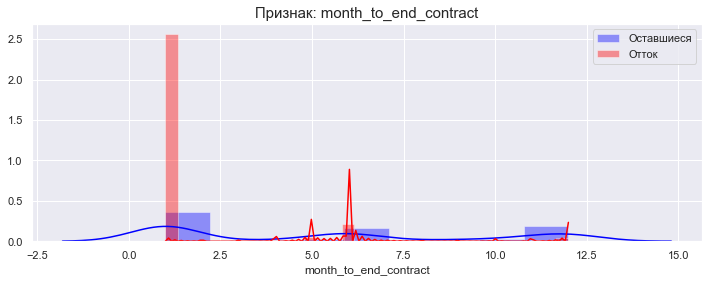

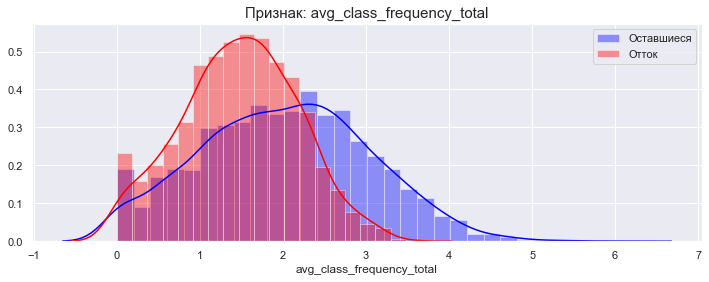

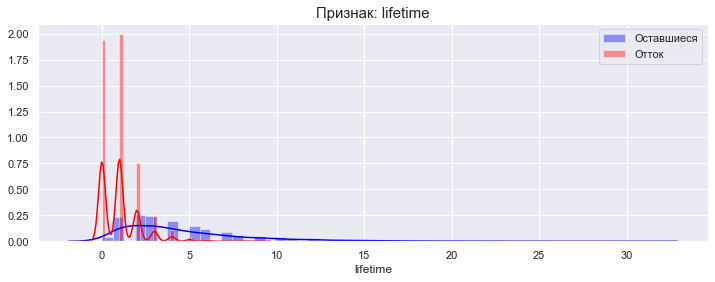

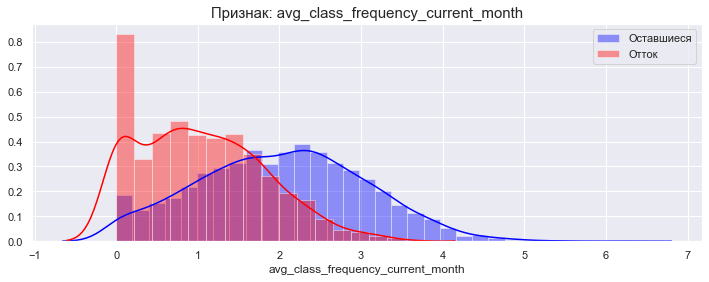

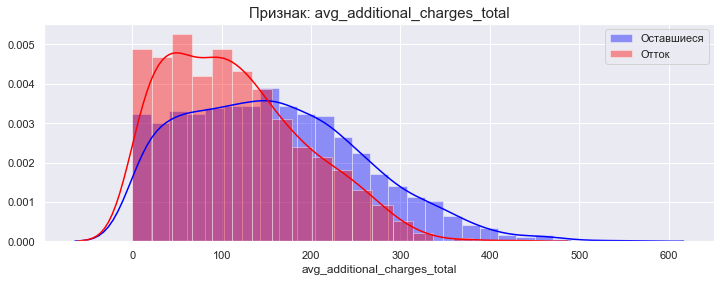

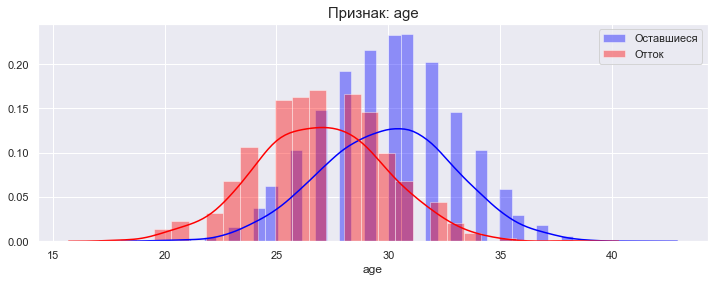

In [10]:
# построение distplot в цикле с размером поля figsize, подписью 
# графика title, графиком sns.distplot и легендой legend
for column in quantitive_features: 
    plt.figure(figsize=(12, 4)) 
    plt.title('Признак: {}'.format(column), fontsize=15)
    
    sns.distplot(gym[gym['churn'] == 0][column], color='blue')
    sns.distplot(gym[gym['churn'] == 1][column], color='red')
    
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

Выводы из полученных распределений:

* Распределение «времени жизни» клиента имеет тяжелый хвост у группы оставшихся, наиболее частые значения: 2-3 месяца у оставшихся, 0-1 месяц – у оттока
* Срок до окончания текущего действующего абонемента, также больше у группы оставшихся, у оттока данный показатель, в основном, 1 месяц
* Средняя частота посещений в неделю за предыдущий месяц имеет близкое к нормальному распеределение у группы оставшихся, наиболее частое значение – около 2 раз в неделю, группа ушедших клиентов за последний месяц практически не посещала фитнес-клуб
* Оставшимся клиентам чаще около 30 лет, ушедшим – 26
* Средняя частота посещений в неделю за все время с начала действия абонемента у группы оттока – 1-2 раза, у оставшихся 2-3 посещения
* Суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон нескольким выше у клиентов группы оттока. Вполне возможно, что абонемент в фитнес-центр берут из-за дополнительных услуг

### Построение матрицы корреляций признаков

---

Отобразим на тепловой карте матрицу корреляций признаков с помощью методов `corr()` и `heatmap()`:

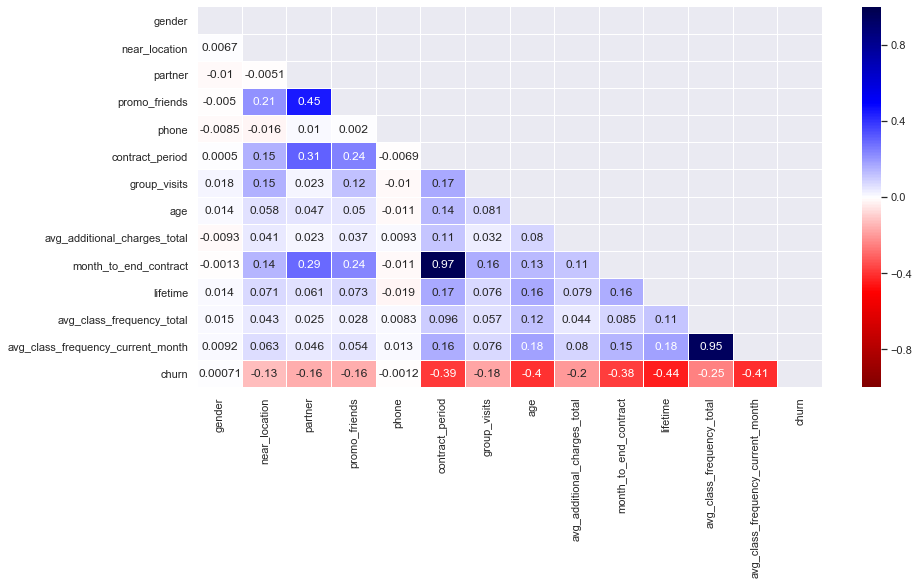

In [11]:
# установление размера поля
plt.figure(figsize=(14, 7))

# задание маски графика для треугольного отображения матрицы
mask = np.triu(np.ones_like(gym.corr(), dtype=np.bool))

# построение тепловой карты по столбцам таблицы gym.corr() методом heatmap() с отображением
# коэфф. корреляции (annot=True, fmt='.2g'), регулировкой измерительной шкалы (vmin=-1, 
# vmax=1, center=0) параметрами линий (linewidths=1) и цветовой гаммой (cmap=Spectral_r)
sns.heatmap(gym.corr(), annot=True, fmt='.2g', linewidths=.01,
            vmin=-1, vmax=1, center= 0, mask=mask, cmap='seismic_r')

# вывод изображения графика
plt.show()

Наблюдаем, что такие признаки как пол и наличие контактного телефона не влияют на конечный показатель оттока. Все остальные показатели имеют обратную корреляцию. Явных признаков, сильно связанных с целевой переменной, предварительный анализ не выделил.

Также наблюдаем, что имеется сильная связь между показателями длительности абонемента `contract_period` и количеством месяцев до конца абонемента `month_to_end_contract`. Это говорит о том, что в выборке представлены клиенты, которые отобраны, вероятно, в начале действия абонемента. Также наблюдается сильная связь между средней частотой посещений в неделю с начала пользования услугами `avg_class_frequency_total` и за предыдущий месяц `avg_class_frequency_current_month`. Это говорит о следующем: скорее всего, клиенты посещают фитнес-центр примерно одинаковое число раз в неделю вне зависимости от того, сколько они пользуются услугами центра.

Для того, чтобы такие признаки не доминировали над остальными переменными при обучении, удалим из датасета `avg_class_frequency_total` и `month_to_end_contract`:

In [12]:
# удаление из таблицы gym столбцов avg_class_frequency_current_month и month_to_end_contract
gym = gym.drop(['avg_class_frequency_current_month', 'month_to_end_contract'], axis=1)

### Вывод по п.2

---

На данном этапе был произведен **исследовательский анализ данных (EDA)**. Изучены *средние значения и стандартные отклонения признаков* (в том числе и в разрезе групп), также произведен *визуальный анализ данных*. По итогу имеем: 

* Практически отстутвует различие в соотношении мужчин и женщин, однако мужчин немного больше (51%)
* Большинство клиентов (85%) проживают или работают рядом с фитнес-центром, также они реже попадают в отток
* Почти половина клиентов (47%) – сотрудники компаний-партнеров клуба, также сотрудники реже перестают посещать фитнесс-клуб, чем остальные клиенты
* 31% клиентов пришел в клуб в рамках акции «приведи друга» – они почти в два раза реже уходят в отток
* Телефон в анкете указан почти у всех клиентов (90%). Его наличие практически не отличается в группах
* Средняя длительность текущего действующего абонемента составляет 4.7 месяца. Медианное же значение – 1 месяц (т.е. больше половины клиентов с абонементом на 1 месяц), также она длительность больше у оставшихся пользователей, в оттоке срок договора составляет 1 месяц
* 41% всех клиентов посещали групповые занятия. Оставшиеся пользователи ходят на них чаще, а клиенты, попавшие в отток, в большистве своем не посещают групповые занятия
* Средний возраст – 29 лет. Оставшимся клиентам чаще около 30 лет, ушедшим – 26
* Средняя выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон – 146.94 у.е. с клиента. Суммарная выручка от других услуг нескольким выше у клиентов группы оттока. Вполне возможно, что абонемент в фитнес-центр берут из-за дополнительных услуг
* Среднее время до конца абонемента – 4,32 месяца. Однако, у более чем половины клиентов – 1 месяц. Оставшееся время до окончания срока действия договора больше у оставшихся клиентов, у оттока данный показатель, в основном, 1 месяц
* В среднем клиенты с центром около 4 месяцев, медианное значение – 3 месяца. Распределение «времени жизни» клиента имеет тяжелый хвост у группы оставшихся, наиболее частые значения: 2-3 месяца у оставшихся, 0-1 месяц – у оттока
* Средняя частота посещений в неделю за прошлый месяц составляет – 1.88, средняя частота посещений в неделю за все время – 1.77. Средняя частота посещений в неделю за предыдущий месяц имеет близкое к нормальному распеределение у группы оставшихся, наиболее частое значение – около 2 раз в неделю, группа ушедших клиентов за последний месяц практически не посещала фитнес-клуб. Средняя частота посещений в неделю за все время с начала действия абонемента у группы оттока – 1-2 раза, у оставшихся 2-3 посещения
* **В прошлом месяце потеряно чуть больше четверти клиентов – 27%**

Также была построена и отображена *матрица корреляций*. Наблюдаем, что такие признаки как пол и наличие контактного телефона не влияют на конечный показатель оттока. Все остальные показатели имеют обратную корреляцию. Явных признаков, сильно связанных с целевой переменной, предварительный анализ не выделил.

Также наблюдаем, что имеется сильная связь между показателями длительности абонемента `contract_period` и количеством месяцев до конца абонемента `month_to_end_contract`. Это говорит о том, что в выборке представлены клиенты, которые отобраны, вероятно, в начале действия абонемента. Также наблюдается сильная связь между средней частотой посещений в неделю с начала пользования услугами `avg_class_frequency_total` и за предыдущий месяц `avg_class_frequency_current_month`. Это говорит о следующем: скорее всего, клиенты посещают фитнес-центр примерно одинаковое число раз в неделю вне зависимости от того, сколько они пользуются услугами центра.

Для того, чтобы такие признаки не доминировали над остальными переменными при обучении, были удалены из датасета признаки `avg_class_frequency_total` и `month_to_end_contract`

---

## Построение модели прогнозирования оттока клиентов

---

Целевой переменной при построении модели прогнозирования оттока клиентов является сам факт оттока клиента в следующем месяце (столбец **`churn`**). В переменную `X` сохраним признаки, в переменную `y` – целевую переменную:

In [13]:
# сохранение признаков и целевой переменной в соответствующие переменные
X = gym.drop('churn', axis=1)
y = gym['churn']

### Разбиение данных на обучающую и валидационную выборку

---

Функцией `train_test_split()` модуля `model_selection` библиотеки `sklearn` разобьем данные на обучающую и валидационную выборку в соотношении 80/20:

In [14]:
# сохранение с помощью функции train_test_split() в переменных X_train, y_train и
# X_test, y_test обучающей (80%) и валидационной (20%) выборки соответственно с 
# параметром random_state=0 для обеспечения воспроизводимости и stratify=y для
# сохранения исходного баланса классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Стандартизируем данные с помощью класса `StandardScaler()` модуля `preprocessing`:

In [15]:
scaler = StandardScaler() # создание объекта класса scaler
X_train_st = scaler.fit_transform(X_train) # обучение и применение стандартизатора для обучающей выборки
X_test_st = scaler.transform(X_test) # применение стандартизатора для тестовой выборки

### Обучение моделей

---

Популярный алгоритм для решения задачи бинарной классификации (так как целевая переменная `churn` в нашем случае – бинарная величина) — **логистическая регрессия**. Она реализована как класс `LogisticRegression()` в модуле `linear_model` библиотеки `sklearn`:

In [16]:
# задание алгоритма для модели с параметром random_state=0 для обеспечения 
# воспроизводимости и установлением алгоритма решения liblinear
LR_model = LogisticRegression(random_state=0, solver='liblinear')

# обучение модели
LR_model.fit(X_train_st, y_train)

# расчет прогноза класса после обучения
LR_pred = LR_model.predict(X_test_st)

Также для задач бинарной классификации применяется ансамблевая модель **случайного леса**, которая реализована в модуле `ensemble` как класс `RandomForestClassifier()`:

In [17]:
# задание алгоритма для модели с параметром random_state=0 для обеспечения
# воспроизводимости и количеством деревьев n_estimators=100
RF_model = RandomForestClassifier(random_state=0, n_estimators=100)

# обучение модели
RF_model.fit(X_train_st, y_train)

# расчет прогноза класса после обучения
RF_pred = RF_model.predict(X_test_st)

Для каждой модели было произведено обучение `fit` и расчет прогноза класса после обучения `predict`

### Оценка метрик и сравнение моделей

---

Расчитаем метрики для оценки качества моделей бинарной классификации, такие как: **accuracy** (доля правильных ответов), **precision** (точность) и **recall** (полнота), реализованные в модуле `metrics`, для чего создадим функцию **`print_metrics()`**:

In [18]:
# создание функции print_metrics() с аргументами model_name, y_true и y_pred
def print_metrics(model_name, y_true, y_pred):
    '''
    Принимает на вход название модели, верные (y_true) и спрогнозированные (y_pred)
    значения классов на валидационной выборке с выводом метрик оценки качества 
    моделей accuracy (доля правильных ответов), precision (точность) и recall (полнота)
    '''
    print('Метрики для', model_name)
    print('Accuracy: {:.2f} / Precision: {:.2f} / Recall: {:.2f}'.format(
            accuracy_score(y_true, y_pred),
            precision_score(y_true, y_pred),
            recall_score(y_true, y_pred))
         )

Для расчета и вывода метрик по обоим моделям вызовем функцию `print_metrics()` с соответствующими аргументами:

In [19]:
# вызов функции print_metrics() с соответствующими аргументами
print_metrics('LogisticRegression', y_test, LR_pred)
print('-----------------------------------------------')
print_metrics('RandomForestClassifier', y_test, RF_pred)

Метрики для LogisticRegression
Accuracy: 0.91 / Precision: 0.83 / Recall: 0.83
-----------------------------------------------
Метрики для RandomForestClassifier
Accuracy: 0.89 / Precision: 0.81 / Recall: 0.79


Таким образом, обе модели способны давать прогнозы достаточно хорошо. Однако, модель логистической регрессии подходит больше по доле правильных ответов (accuracy) и полноте (recall)

### Вывод по п.3

---

На данном этапе было произведено **построение модели прогнозирования оттока клиентов**. Целевой переменной при построении модели прогнозирования оттока клиентов являлся сам факт оттока клиента в следующем месяце (столбец **`churn`**)

Функцией `train_test_split()` модуля `model_selection` библиотеки `sklearn` данные были разбиты на обучающую и валидационную выборку в соотношении 80/20 и далее стандартизироованы с помощью класса `StandardScaler()` модуля `preprocessing`

Для решения задачи бинарной классификации (так как целевая переменная `churn` в нашем случае – бинарная величина) был использован алгоритм *логистической регрессии*, реализованный как класс `LogisticRegression()` и ансамблевая модель *случайного леса* `RandomForestClassifier()`

В заключении расчитаны метрики для оценки качества моделей бинарной классификации, такие как: *accuracy* (доля правильных ответов), *precision* (точность) и *recall* (полнота), реализованные в модуле `metrics`, для чего создана функция `print_metrics()`

По итогу имеем, что обе модели способны давать прогнозы достаточно хорошо. Однако, **модель логистической регрессии подходит больше** по доле правильных ответов (accuracy) и полноте (recall)

---

## Кластеризация клиентов

---

### Стандартизация данных

---

При кластеризации клиентов столбец с оттоком `churn` не понадобится, поэтому в этом пункте будем работать с ранее созданной переменной `X`. Стандартизируем данные с помощью класса `StandardScaler()` модуля `preprocessing`:

In [20]:
scaler = StandardScaler() # создание объекта класса scaler
X_sc = scaler.fit_transform(X) # обучение и применение стандартизатора для выборки

### Построение матрицы расстояний и дендрограммы

---

Сохраним в переменной `links` матрицу расстояний, полученную с помощью метода `linkage` и визуализируем расстояния между объектами, а также саму **агломеративную иерархическую кластеризацию** методом `dendrogram`:

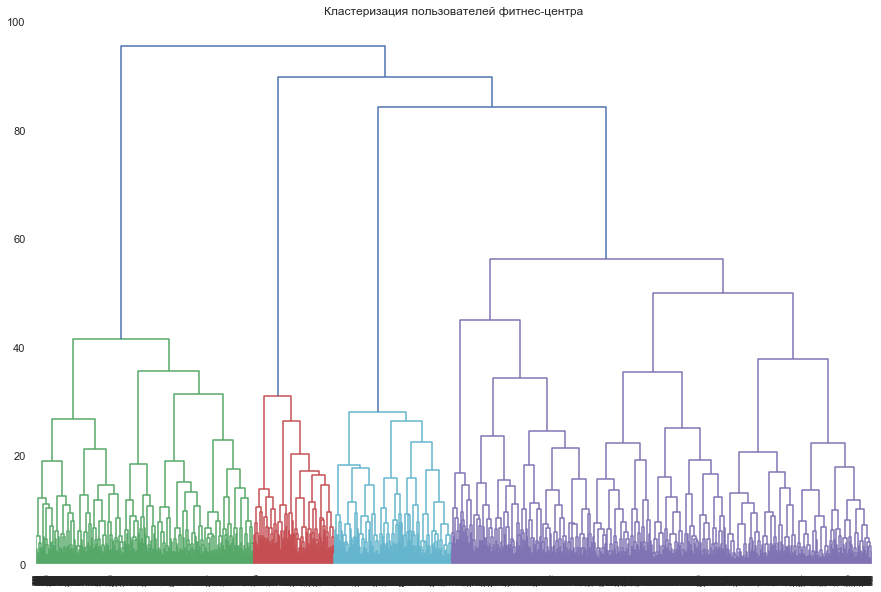

In [21]:
# сохранение матрицы расстояний в переменной links
links = linkage(X_sc, method = 'ward')

# построение дендрограммы методом dendrogram
plt.figure(figsize=(15, 10))
plt.title('Кластеризация пользователей фитнес-центра')
dendrogram(links, orientation='top')
plt.show()

По дендрограмме наблюдаем наличие **четырёх кластеров** в данных

### Прогнозирование кластеров клиентов с помощью алгоритма K-Means

---

Было принято решение использовать **пять кластеров** для кластеризации клиентов. Обучим модель кластеризации на основании алгоритма **K-Means**, который реализован в модуле `sklearn.cluster`, и спрогнозируем кластеры клиентов:

In [22]:
# задание моделм K-means с параметром random_state=0 для обеспечения 
# воспроизводимости и числом кластеров n_clusters=5
KM_model = KMeans(random_state=0, n_clusters=5)

# расчет прогноза кластеров с сохранением в переменную labels
labels = KM_model.fit_predict(X_sc)

В переменной `labels` сохраняются индексы предложенных алгоритмом групп. Запишем метки кластера в поле `cluster_km` датасета `gym` и переименуем их в более понятные:

In [23]:
# сохранение меток кластера в поле cluster_km таблицы gym
gym['cluster_km'] = pd.Series(labels)

# переименование кластеров в цикле
for i in range(0, 5):
    gym.loc[gym['cluster_km']==i, 'cluster_km'] = 'cluster_{}'.format(i)

### Изучение средних значений признаков для кластеров

---

Изучим средние значения по признакам в разрезе кластеров, для чего применим метод `groupby()`:

In [24]:
# группировка клиентов по столбцу cluster_km с вычислением среднего по всем признакам mean()
# с помощью метода groupby() и транспонирование таблицы для более удобного отображения
gym.groupby('cluster_km').mean().T

cluster_km,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
gender,0.499109,0.488571,0.505300,0.544202,0.523316
near_location,0.000000,0.995238,1.000000,1.000000,0.862694
partner,0.488414,0.955238,0.238516,0.250287,0.471503
promo_friends,0.076649,0.892381,0.059187,0.079219,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,3.032086,7.660952,2.819788,4.528129,4.777202
group_visits,0.235294,0.458095,0.000000,1.000000,0.427461
age,28.721925,29.543810,28.770318,29.536165,29.297927
avg_additional_charges_total,137.540009,155.861428,143.383993,148.088897,144.208179
lifetime,3.060606,4.380952,3.343640,3.761194,3.940415


Опишем характерные черты кластеров:

0) **Кластер 0**. Живут или работают далеко от фитнес-центра, в основном обладатели среднесрочных абонементов на 3 месяца, наименьшее среднее количество посещений за всё время

1) **Кластер 1**. Живут или работают в районе фитнес-центра, чаще всех посещают клуб – 2 раза в неделю, абонементы на длительный срок – в среднем около 8 месяцев, преобладают сотрудники компаний-партнеров – 95%, первоначально записались по промо-акции

2) **Кластер 2**. Живут или работают в непосредственной близости от фитнес-центра, покупают абонементы на 3 месяца, не посещают групповые занятия, практически не являются сотрудниками компаний-партнеров

3) **Кластер 3**. Живут или работают в непосредственной близости от фитнес-центра, покупают абонементы более, чем на 3 месяца, все посещают групповые занятия, практически не являются сотрудниками компаний-партнеров

4) **Кластер 4**. Живут или работают в районе фитнес-центра, не указали мобильный телефон, покупают абонементы почти на 5 месяцев

### Визуализация распределения признаков для кластеров

---

Построим график частот для бинарных переменных:

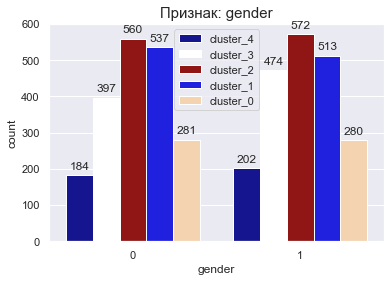

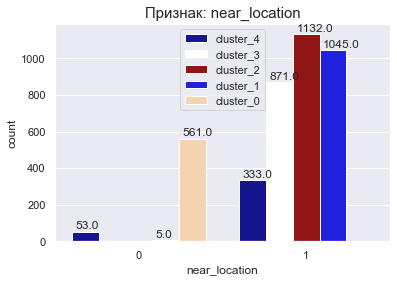

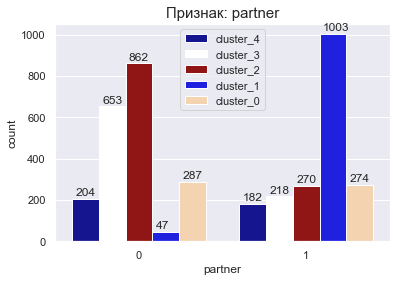

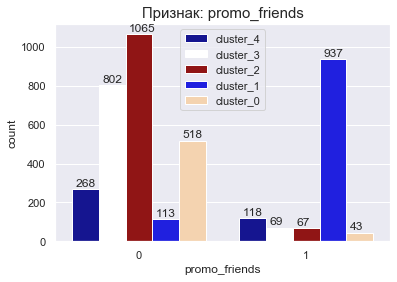

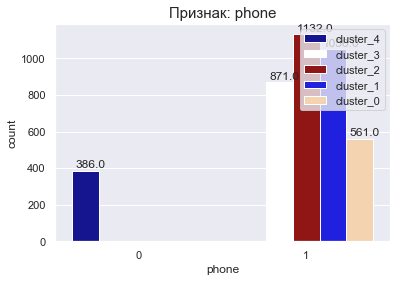

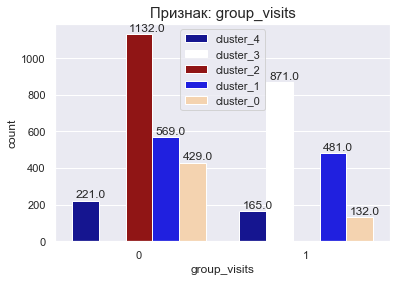

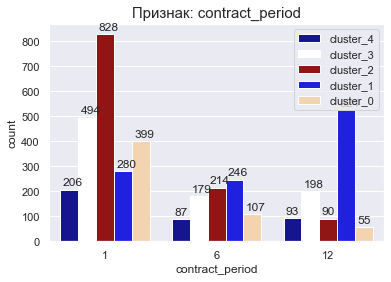

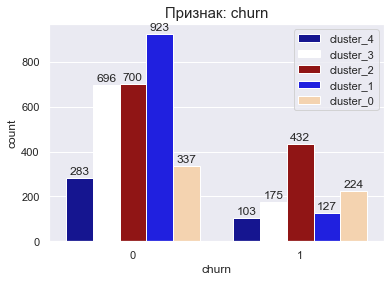

In [25]:
# построение countplot в цикле с размером поля figsize, подписью графика title,
# графиком ax, подписями столбцов ax.annotate и легендой legend
for column in binary_features:
    plt.figure(figsize=(6, 4))
    plt.title('Признак: {}'.format(column), fontsize=15)

    ax = sns.countplot(data=gym, x=gym[column], hue='cluster_km', palette='flag')

    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.02, p.get_height()+15))
    
    plt.legend(list(gym['cluster_km'].unique()))    
    plt.show()

Обновим список количественных признаков `quantitive_features` после удаления нескольких столбцов ранее, а также удалим название столбца `cluster_km`:

In [26]:
# создание списка quantitive_features с количественными признаками 
quantitive_features = list(set(gym.columns) - set(binary_features))

# удаление из списка quantitive_features значения cluster_km
quantitive_features.remove('cluster_km')

Построим боксплоты распределения признаков для количественных переменных:

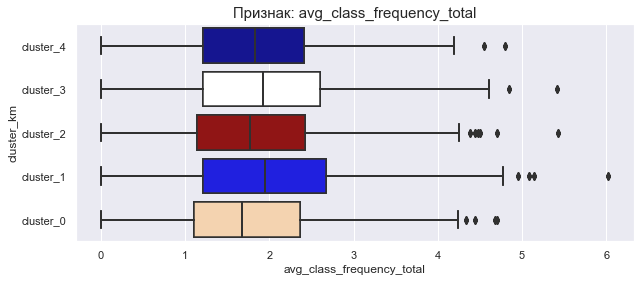

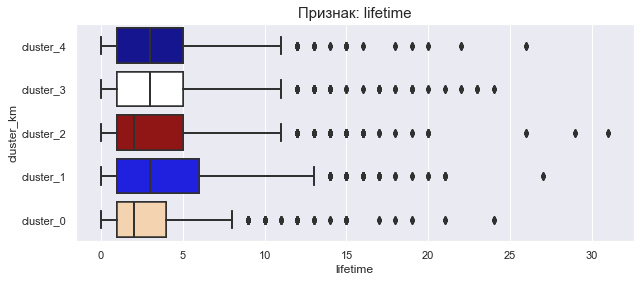

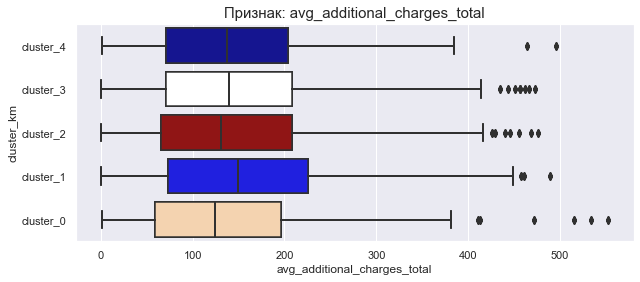

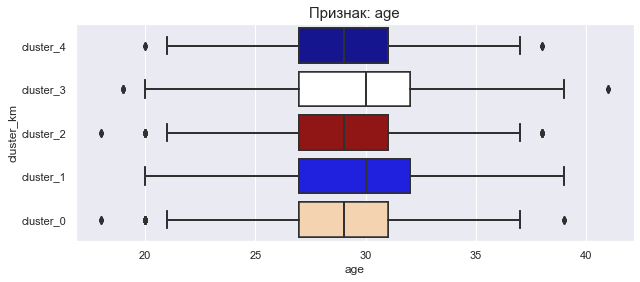

In [27]:
# построение коробчатой диаграммы в цикле с размером поля figsize,
# подписью графика title, графиком sns.boxplot и легендой legend
for column in quantitive_features: 
    plt.figure(figsize=(10, 4)) 
    plt.title('Признак: {}'.format(column), fontsize=15)
    
    for cluster in list(gym['cluster_km'].unique()):
        sns.boxplot(data=gym, x=column, y='cluster_km', palette='flag')
    
    plt.show()

Опишем влияние признаков на кластеры:

1) **Пол**. Распределение мужчин и женщин по все кластерам примерно одинаковое <br/>
2) **Проживание или работа в районе фитнес-центра**. Наиболее высок данный показатель по `cluster_2` и `cluster_1`. Клиенты `cluster_0` не находится в районе фитнес-центра <br/>
3) **Сотрудник компании-партнёра клуба**. Максимально по `cluster_1`, клиенты `cluster_2` практически не являются  сотрудниками компаний-партнёров клуба <br/>
4) **Акция «приведи друга»**. Практически все клиенты `cluster_1` первоначально записались по данной акции, обратная ситуация по `cluster_2` <br/>
5) **Наличие контактного телефона**. Телефон не указан только у клиентов `cluster_4` <br/>
6) **Факт посещения групповых занятий**. На групповых занятиях полностью отсутствовали клиенты `cluster_2`, максимальный показатель присутствия у `cluster_3` <br/>
7) **Длительность текущего действующего абонемента**. Клиенты `cluster_2` чаще всего покупают абонемент на 1 месяц, обладатели годовых абонементов – клиенты `cluster_1` <br/>
8) **Cуммарная выручка от других услуг фитнес-центра**. Медианный показатель выше у клиентов `cluster_1`, минимальный – по `cluster_4` <br/>
9) **Возраст**. Возраст по всем кластерам примерно одинаковый и колеблется в районе 28-30 лет <br/>
10) **Средняя частота посещений в неделю за все время абонемента**. Реже всех посещают фитнес-центр клиенты `cluster_0`, чаще всех – `cluster_1` <br/>
11) **Время с момента первого обращения в фитнес-центр**. Дольше всех с фитнес-центром клиенты `cluster_1`, недавно пришедшие – клиенты `cluster_0`

### Расчет доли оттока для кластеров

---

Сгруппируем кластеры методом `groupby()` для расчета доли оттока по каждому из них:

In [28]:
# вывод доли оттока клиентов для кластеров с помощью метода
# groupby() отсортированного по убыванию методом sort_values()
gym.groupby('cluster_km', as_index=False)['churn'].mean().sort_values(by='churn', ascending=False)

,cluster_km,churn
0,cluster_0,0.399287
2,cluster_2,0.381625
4,cluster_4,0.266839
3,cluster_3,0.200918
1,cluster_1,0.120952


Наблюдаем, что на примерно равных позициях по доле оттока находятся **`cluster_0`** (40%) и **`cluster_2`** (38%). Самый «стойкий» – **`cluster_1`** (доля оттока – 12%)

### Вывод по п.4

---

На данном этапе была произведена **кластеризация посетителей фитнес-центра**. По стандартизированным данным построена матрица расстояний, полученная с помощью метода `linkage` и визуализированы расстояния между объектами, а также сама агломеративная иерархическая кластеризация методом `dendrogram`. По дендрограмме выделено наличие четырёх кластеров в данных

Далее было принято решение использовать пять кластеров для кластеризации клиентов. Обученная модель на основании алгоритма **K-Means**, спрогнозировала необходимые пять кластеров клиентов. 

**Выводы по кластерам:**

0) **Кластер 0**. Живут или работают далеко от фитнес-центра, в основном обладатели среднесрочных абонементов на 3 месяца, наименьшее среднее количество посещений за всё время, записались в первый раз относительно недавно – 1-2 месяца. <br/> **Самый большой процент оттока – 40%!**

1) **Кластер 1**. Живут или работают в районе фитнес-центра, чаще всех посещают клуб – 2 раза в неделю, абонементы на длительный срок – в среднем около 8 месяцев (по большей части все абонементы годовые), преобладают сотрудники компаний-партнеров – 95%, практически все первоначально записались по промо-акции, дольше всех с фитнес-центром, самая высокая выручка от других услуг. <br/> **Самый низкий процент оттока – 12%!**

2) **Кластер 2**. Живут или работают в непосредственной близости от фитнес-центра, не пользовались промо-акцией «приведи друга», покупают абонементы, в среднем, на 3 месяца (чаще всего на 1 месяц), не посещают групповые занятия, практически не являются сотрудниками компаний-партнеров. <br/> **Отток – 38%**

3) **Кластер 3**. Живут или работают в непосредственной близости от фитнес-центра, покупают абонементы более, чем на 3 месяца, все посещают групповые занятия, практически не являются сотрудниками компаний-партнеров. <br/> **Отток – 20%**

4) **Кластер 4**. Живут или работают в районе от фитнес-центра, все не указали мобильный телефон, покупают абонементы почти на 5 месяцев, минимальная выручка от других услуг. <br/> **Отток – 27%**

**Рекомендации по итогу:**

1) Привлечение в фитнес-центр клиентов из близлежащих районов

2) Активное продвижение абонементов более длительного срока (9 и 12 месяцев) – это стимулирует посещать занятия (клиенту жалко потраченных денег)

3) Кластер с длительными абонементами больше пользуется дополнительными услугами, для них возможно введение специальных скидок и акций

4) Установление более выгодных цен на длительные абонементы, что простимулиет посетителей к покупке и снизит риск оттока клиентов в первые месяцы

5) Введение более выгодного продления абонемента для клиентов, покупающих абонемент на срок от 3 месяцев. Подобные скидки восполнятся дополнительными услугами, преобладающими у лояльных клиентов 

6) Проведение мониторинга средней частоты посещений фитнес-центра в неделю по клиентам. При обнаружении снижения показателя предлагать клиентам бонусы (бесплатная разовая дополнительная услуга, скидки на продление абонемента, одно бесплатное групповое занятие и т.д.)

---

## Общий вывод исследования
---

На **первом этапе** было произведено **получение данных о посетителях фитнес-центра**. Датасет содержит полную информацию, необходимую для кластеризации клиентов и построения модели прогнозирования оттока посетителей

В ходе проведения обзора представленных данных была создана функция `show_full_info()` для вывода пяти первых записей в таблице и полной информации о ней, а также количества артефактов по столбцам. Пропущенных, некорректных значений, а также полных дубликатов строк не выявлено

Названия столбцов приведены к нижнему регистру, тип данных в столбце `month_to_end_contract` (срок до окончания текущего действующего абонемента в месяцах) изменен на целочисленный `int`

<br/> <br/>
На **втором этапе** был произведен **исследовательский анализ данных (EDA)**. Изучены *средние значения и стандартные отклонения признаков* (в том числе и в разрезе групп), также произведен *визуальный анализ данных*. По итогу имеем: 

* Практически отстутвует различие в соотношении мужчин и женщин, однако мужчин немного больше (51%)
* Большинство клиентов (85%) проживают или работают рядом с фитнес-центром, также они реже попадают в отток
* Почти половина клиентов (47%) – сотрудники компаний-партнеров клуба, также сотрудники реже перестают посещать фитнесс-клуб, чем остальные клиенты
* 31% клиентов пришел в клуб в рамках акции «приведи друга» – они почти в два раза реже уходят в отток
* Телефон в анкете указан почти у всех клиентов (90%). Его наличие практически не отличается в группах
* Средняя длительность текущего действующего абонемента составляет 4.7 месяца. Медианное же значение – 1 месяц (т.е. больше половины клиентов с абонементом на 1 месяц), также она длительность больше у оставшихся пользователей, в оттоке срок договора составляет 1 месяц
* 41% всех клиентов посещали групповые занятия. Оставшиеся пользователи ходят на них чаще, а клиенты, попавшие в отток, в большистве своем не посещают групповые занятия
* Средний возраст – 29 лет. Оставшимся клиентам чаще около 30 лет, ушедшим – 26
* Средняя выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон – 146.94 у.е. с клиента. Суммарная выручка от других услуг нескольким выше у клиентов группы оттока. Вполне возможно, что абонемент в фитнес-центр берут из-за дополнительных услуг
* Среднее время до конца абонемента – 4,32 месяца. Однако, у более чем половины клиентов – 1 месяц. Оставшееся время до окончания срока действия договора больше у оставшихся клиентов, у оттока данный показатель, в основном, 1 месяц
* В среднем клиенты с центром около 4 месяцев, медианное значение – 3 месяца. Распределение «времени жизни» клиента имеет тяжелый хвост у группы оставшихся, наиболее частые значения: 2-3 месяца у оставшихся, 0-1 месяц – у оттока
* Средняя частота посещений в неделю за прошлый месяц составляет – 1.88, средняя частота посещений в неделю за все время – 1.77. Средняя частота посещений в неделю за предыдущий месяц имеет близкое к нормальному распеределение у группы оставшихся, наиболее частое значение – около 2 раз в неделю, группа ушедших клиентов за последний месяц практически не посещала фитнес-клуб. Средняя частота посещений в неделю за все время с начала действия абонемента у группы оттока – 1-2 раза, у оставшихся 2-3 посещения
* **В прошлом месяце потеряно чуть больше четверти клиентов – 27%**

Также была построена и отображена *матрица корреляций*. Наблюдаем, что такие признаки как пол и наличие контактного телефона не влияют на конечный показатель оттока. Все остальные показатели имеют обратную корреляцию. Явных признаков, сильно связанных с целевой переменной, предварительный анализ не выделил

Также наблюдаем, что имеется сильная связь между показателями длительности абонемента `contract_period` и количеством месяцев до конца абонемента `month_to_end_contract`. Это говорит о том, что в выборке представлены клиенты, которые отобраны, вероятно, в начале действия абонемента. Также наблюдается сильная связь между средней частотой посещений в неделю с начала пользования услугами `avg_class_frequency_total` и за предыдущий месяц `avg_class_frequency_current_month`. Это говорит о следующем: скорее всего, клиенты посещают фитнес-центр примерно одинаковое число раз в неделю вне зависимости от того, сколько они пользуются услугами центра

Для того, чтобы такие признаки не доминировали над остальными переменными при обучении, были удалены из датасета признаки `avg_class_frequency_total` и `month_to_end_contract`

<br/> <br/>
На **третьем этапе** было произведено **построение модели прогнозирования оттока клиентов**. Целевой переменной при построении модели прогнозирования оттока клиентов являлся сам факт оттока клиента в следующем месяце (столбец **`churn`**)

Функцией `train_test_split()` модуля `model_selection` библиотеки `sklearn` данные были разбиты на обучающую и валидационную выборку в соотношении 80/20 и далее стандартизироованы с помощью класса `StandardScaler()` модуля `preprocessing`

Для решения задачи бинарной классификации (так как целевая переменная `churn` в нашем случае – бинарная величина) был использован алгоритм *логистической регрессии*, реализованный как класс `LogisticRegression()` и ансамблевая модель *случайного леса* `RandomForestClassifier()`

В заключении расчитаны метрики для оценки качества моделей бинарной классификации, такие как: *accuracy* (доля правильных ответов), *precision* (точность) и *recall* (полнота), реализованные в модуле `metrics`, для чего создана функция `print_metrics()`

По итогу имеем, что обе модели способны давать прогнозы достаточно хорошо. Однако, **модель логистической регрессии подходит больше** по доле правильных ответов (accuracy) и полноте (recall)

<br/> <br/>
На **четвертом этапе** была произведена **кластеризация посетителей фитнес-центра**. По стандартизированным данным построена матрица расстояний, полученная с помощью метода `linkage` и визуализированы расстояния между объектами, а также сама агломеративная иерархическая кластеризация методом `dendrogram`. По дендрограмме выделено наличие четырёх кластеров в данных

Далее было принято решение использовать пять кластеров для кластеризации клиентов. Обученная модель на основании алгоритма **K-Means**, спрогнозировала необходимые пять кластеров клиентов. 

**Выводы по кластерам:**

0) **Кластер 0**. Живут или работают далеко от фитнес-центра, в основном обладатели среднесрочных абонементов на 3 месяца, наименьшее среднее количество посещений за всё время, записались в первый раз относительно недавно – 1-2 месяца. <br/> **Самый большой процент оттока – 40%!**

1) **Кластер 1**. Живут или работают в районе фитнес-центра, чаще всех посещают клуб – 2 раза в неделю, абонементы на длительный срок – в среднем около 8 месяцев (по большей части все абонементы годовые), преобладают сотрудники компаний-партнеров – 95%, практически все первоначально записались по промо-акции, дольше всех с фитнес-центром, самая высокая выручка от других услуг. <br/> **Самый низкий процент оттока – 12%!**

2) **Кластер 2**. Живут или работают в непосредственной близости от фитнес-центра, не пользовались промо-акцией «приведи друга», покупают абонементы, в среднем, на 3 месяца (чаще всего на 1 месяц), не посещают групповые занятия, практически не являются сотрудниками компаний-партнеров. <br/> **Отток – 38%**

3) **Кластер 3**. Живут или работают в непосредственной близости от фитнес-центра, покупают абонементы более, чем на 3 месяца, все посещают групповые занятия, практически не являются сотрудниками компаний-партнеров. <br/> **Отток – 20%**

4) **Кластер 4**. Живут или работают в районе от фитнес-центра, все не указали мобильный телефон, покупают абонементы почти на 5 месяцев, минимальная выручка от других услуг. <br/> **Отток – 27%**

**Рекомендации по итогу:**

1) Привлечение в фитнес-центр клиентов из близлежащих районов

2) Активное продвижение абонементов более длительного срока (9 и 12 месяцев) – это стимулирует посещать занятия (клиенту жалко потраченных денег)

3) Кластер с длительными абонементами больше пользуется дополнительными услугами, для них возможно введение специальных скидок и акций

4) Установление более выгодных цен на длительные абонементы, что простимулиет посетителей к покупке и снизит риск оттока клиентов в первые месяцы

5) Введение более выгодного продления абонемента для клиентов, покупающих абонемент на срок от 3 месяцев. Подобные скидки восполнятся дополнительными услугами, преобладающими у лояльных клиентов 

6) Проведение мониторинга средней частоты посещений фитнес-центра в неделю по клиентам. При обнаружении снижения показателя предлагать клиентам бонусы (бесплатная разовая дополнительная услуга, скидки на продление абонемента, одно бесплатное групповое занятие и т.д.)

---

[**Вернуться к началу**](#Прогнозирование-оттока-клиентов-фитнес-центра)